In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)

#Import Data
data=pd.read_csv("C:/Users/Home/Python Projects/Mahindra Capstone/Final_invoice.csv")
data.head()

E:\Akshay\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [43]:
data.shape

(492314, 59)

In [44]:
data['Invoice Date']=pd.to_datetime(data['Invoice Date'], format='%Y-%m-%d').dt.date

In [45]:
data=data[(pd.to_datetime(data['Invoice Date']).dt.year==2016)]

In [46]:
data['Invoice Date'].value_counts()

2016-09-30    1983
2016-08-31    1959
2016-05-31    1568
2016-07-19    1549
2016-10-28    1546
              ... 
2016-01-03      89
2016-01-01      88
2016-04-03      79
2016-05-01      28
2016-08-15       1
Name: Invoice Date, Length: 305, dtype: int64

In [69]:
data_clv=data[['Customer No.','Invoice Date','Total Amt Wtd Tax.']].reset_index()

In [70]:
data_clv.head()

,index,Customer No.,Invoice Date,Total Amt Wtd Tax.
0,295028,119371,2016-01-02,3499.28
1,295029,128929,2016-01-02,429.29
2,295030,119371,2016-01-02,0.00
3,295031,E10724,2016-01-02,367.62
4,295032,92107,2016-01-02,743.08


In [71]:
data_clv['Customer No.'].nunique()

131243

In [72]:
#Check the Last order date
last_order_date = data_clv['Invoice Date'].max()
print(last_order_date)
print("--------------------------------------")

2016-10-31
--------------------------------------


In [73]:
# pip install Lifetimes

In [74]:
data_clv = data_clv[(data_clv['Total Amt Wtd Tax.']>0)]

In [75]:
data_clv.shape

(178575, 4)

In [76]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [77]:
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

data_clv = summary_data_from_transaction_data(data_clv, 'Customer No.', 'Invoice Date', monetary_value_col='Total Amt Wtd Tax.', observation_period_end='2016-10-31')
data_clv.reset_index().head()

,Customer No.,frequency,recency,T,monetary_value
0,100007,2.0,144.0,233.0,19668.600000
1,100011,0.0,0.0,196.0,0.000000
2,100018,2.0,13.0,97.0,5713.040000
3,100019,0.0,0.0,125.0,0.000000
4,100022,3.0,124.0,196.0,14180.093333


count    122465.000000
mean          0.412624
std           1.012107
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          56.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers Visited only once: 74.93 %


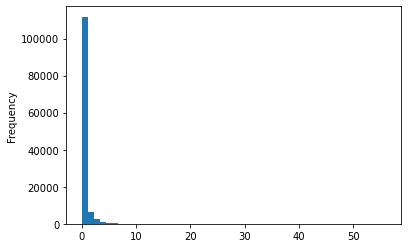

In [78]:
#Create histogram to find out how many customers purchased item only once.
data_clv['frequency'].plot(kind='hist', bins=50)
print(data_clv['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(data_clv['frequency'] == 0)/float(len(data_clv))*(100),2)
print("Percentage of customers Visited only once:", one_time_buyers ,"%")

In [79]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data_clv['frequency'], data_clv['recency'], data_clv['T'])

<lifetimes.BetaGeoFitter: fitted with 122465 subjects, a: 1.51, alpha: 74.13, b: 3.17, r: 0.31>

In [80]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.311401,0.004360,0.302855,0.319947
alpha,74.127320,1.502111,71.183182,77.071458
a,1.508208,0.122258,1.268581,1.747834
b,3.172447,0.286969,2.609989,3.734906


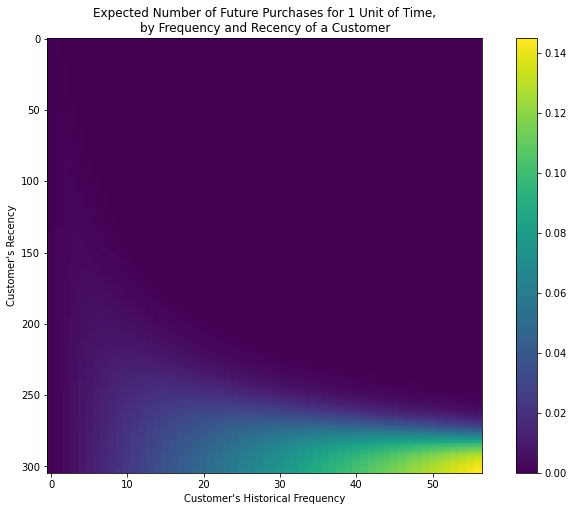

In [81]:
#Visualizing our frequency/recency matrix
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

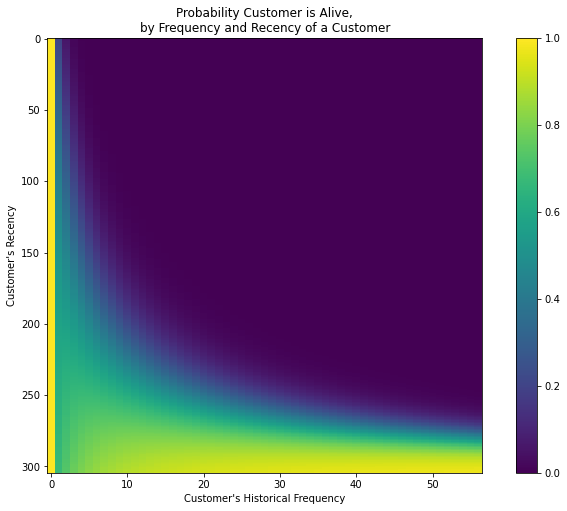

In [82]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [83]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data
t = 10
data_clv['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, data_clv['frequency'], data_clv['recency'], data_clv['T']),2)
data_clv.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,Customer No.,frequency,recency,T,monetary_value,pred_num_txn
0,221957,48.0,81.0,81.0,1605.627708,2.89
1,148721,56.0,275.0,277.0,16070.347500,1.52
2,111693,36.0,296.0,301.0,398.644167,0.89
3,E11206,35.0,290.0,301.0,6414.929714,0.83
4,127513,31.0,296.0,301.0,341.202258,0.77
5,203607,15.0,124.0,124.0,1283.690000,0.69
6,222039,11.0,77.0,79.0,30174.776364,0.63
7,240382,8.0,37.0,40.0,1134.916250,0.59
8,115095,24.0,286.0,297.0,17446.453750,0.57
9,82793,20.0,282.0,282.0,2644.278500,0.52


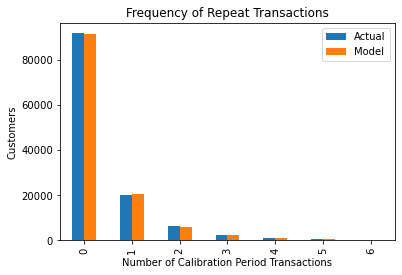

In [84]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [90]:
data_clv.head().reset_index()

,Customer No.,frequency,recency,T,monetary_value,pred_num_txn
0,100007,2.0,144.0,233.0,19668.600000,0.04
1,100011,0.0,0.0,196.0,0.000000,0.01
2,100018,2.0,13.0,97.0,5713.040000,0.05
3,100019,0.0,0.0,125.0,0.000000,0.02
4,100022,3.0,124.0,196.0,14180.093333,0.07


In [97]:
#Customer's future transaction prediction for next 100 days
t = 100
individual = data_clv.reset_index().loc[5]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

0.08709870076631565

In [98]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
data_clv[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.265181
frequency,0.265181,1.000000


In [99]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = data_clv[data_clv['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

  Customer No.  frequency  recency      T  monetary_value  pred_num_txn
0       100007        2.0    144.0  233.0    19668.600000          0.04
1       100018        2.0     13.0   97.0     5713.040000          0.05
2       100022        3.0    124.0  196.0    14180.093333          0.07
3       100035        1.0     49.0  153.0      331.880000          0.03
4       100043        2.0    130.0  153.0      659.150000          0.07
-----------------------------------------
The Number of Returning Customers are:  30700


In [100]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 30700 subjects, p: 0.57, q: 1.96, v: 8420.56>


In [102]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        data_clv['frequency'],
        data_clv['monetary_value']
    ).head(10))

Customer No.
100007    13027.639677
100011     5054.721623
100018     5413.881480
100019     5054.721623
100022    10922.021711
100026     5054.721623
100035     3283.133055
100040     5054.721623
100043     2656.622265
100061     5054.721623
dtype: float64


In [103]:
data_clv['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        data_clv['frequency'],
        data_clv['monetary_value']), 2)
data_clv.reset_index().head()

,Customer No.,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,100007,2.0,144.0,233.0,19668.600000,0.04,13027.64
1,100011,0.0,0.0,196.0,0.000000,0.01,5054.72
2,100018,2.0,13.0,97.0,5713.040000,0.05,5413.88
3,100019,0.0,0.0,125.0,0.000000,0.02,5054.72
4,100022,3.0,124.0,196.0,14180.093333,0.07,10922.02


In [105]:
#Calculate Customer Lifetime Value for 1 year
data_clv['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data_clv['frequency'],
    data_clv['recency'],
    data_clv['T'],
    data_clv['monetary_value'],
    time=12 # months
), 2)

data_clv.drop(data_clv.iloc[:, 0:6], inplace=True, axis=1)

data_clv.sort_values(by='CLV', ascending=False).head(10).reset_index()

,Customer No.,CLV
0,164806,925782.01
1,148721,492232.22
2,172936,368050.44
3,241519,344918.64
4,222039,265348.37
5,104639,221001.61
6,E11208,215715.15
7,84810,208792.65
8,115095,205790.84
9,213011,195345.39
